In [3]:
#37% rule
#This algorithm is set to solve the secretary problem.
#this is a subset of problems concerned with 'which is the best place to stop' 
# "Imagine you are interviewing a set of applicants for a position as secretary,and your goal is to maximise the chance of hiring the single best applicant from the pool.
# the rules are simple, we cannot know what qualifies someone as best, only a numerical rank relative to others. At any time we can give an offer to the current applicant and they are guaranteed to accept, ending the search, additionally, any applicants who are passed over, cannot be offered.

In [4]:
#we will perform a few strategies before fitting the most optimal, named the 'look then leap' strategy
#First we should set up our data.

In [5]:
#here is our list of applicants, with a name and a rank.

In [1]:
import numpy as np
import names as ns
import random
import pandas as pd
import Strategies as stg
import matplotlib as mp
from matplotlib import pyplot as plt

In [2]:
def report(strat_list):
    plt.hist(strat_list, density=True, bins = 100)
    best_rank = min(strat_list)
    print("Frequency of best result:", round((strat_list.count(1)/len(strat_list)*100), 2))

In [11]:
best_of_three_winners = []
for i in range(0,999):
    try:
        x = stg.best_of_three()
        best_of_three_winners.append(x)
    except:
        pass

In [5]:
best_of_two_winners = []
for i in range(0,999):
    try:
        x = stg.best_of_two()
        best_of_two_winners.append(x)
    except:
        pass


Frequency of best result: 14.99


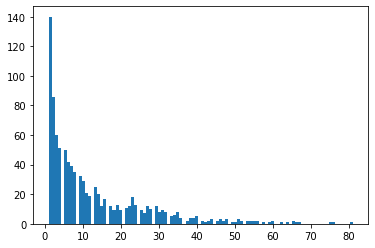

In [10]:
report(best_of_two_winners)

Frequency of best result: 22.68


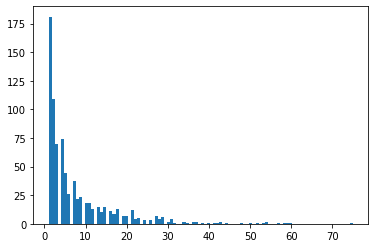

In [12]:
report(best_of_three_winners)

In [3]:
best_of_leap_winners = []
for i in range(0,999):
    try:
        x = stg.look_leap(37, 100)
        best_of_leap_winners.append(x)
    except:
        pass

Frequency of best result: 36.9


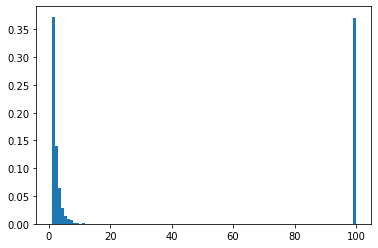

In [4]:
report(best_of_leap_winners)

In [3]:
#graph to show the probability of the nth candidate being the best
def pcbest(n, list):
    pc = (1/len(list[:(list.index(n)+1)]))*100
    return pc


In [13]:
range1 = range(0,100)

In [14]:
lst1 = list(range1)

In [3]:
percentages = []

In [6]:
for i in range(1,101):
    result = pcbest(i,lst1)
    percentages.append(result)

In [3]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Raw % chance of being the best applicant seen so far')

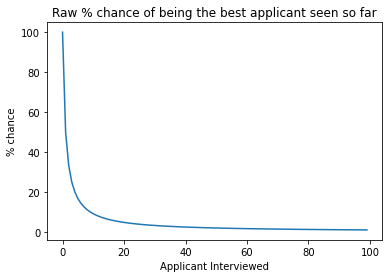

In [12]:
plt.plot(percentages)
plt.xlabel("Applicant Interviewed")
plt.ylabel("% chance")
plt.title("Raw % chance of being the best applicant seen so far")

In [13]:
plt.plot(x)
plt.xlabel("Size of applicant pool")
plt.ylabel("% chance of best applicant chosen")
plt.title("Success Rate of Strategies")



NameError: name 'x' is not defined

In [4]:
def success_finder(func, max_passes, steps, stop):
    success_list = []
    passes = range(0,max_passes) 
    for i in passes[::steps]: #do x times where x is the nr of times steps goes into max
        if i > 0:
            results = []
            for y in range(0,100):
                z = func(stop = stop, list_len = i)
                results.append(z)
            success_list.append(results)
        else:
            pass
    return success_list



    

In [5]:
success_rate_leap = success_finder(stg.look_leap, max_passes= 110, steps = 10, stop= 37)

3
3
3
3
3
3
3
3


ValueError: min() arg is an empty sequence

In [5]:
success_rate_leap

[0, 0, 0, 0, 1, 1, 1, 0, 0]